Downloading the dataset using API Key

In [34]:
#!/bin/bash
!kaggle datasets download uciml/sms-spam-collection-dataset

Dataset URL: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset
License(s): unknown
sms-spam-collection-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


Extracting the zip file

In [35]:
import zipfile

# Extracting the zip file without listing contents
with zipfile.ZipFile('/content/sms-spam-collection-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/extracted_files')


In [36]:
import pandas as pd
import numpy as np

emails_path = "/content/extracted_files/spam.csv"
# Specify the encoding as 'latin1' to handle the invalid bytes
emails = pd.read_csv(emails_path, encoding='latin1')

emails.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [37]:
emails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [38]:
emails.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [39]:
emails.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


Preprocessing

In [40]:
# Text preprocessing (optional: customize as needed)
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
nltk.download('stopwords')


# Clean data
emails = emails[['v1', 'v2']]
emails.columns = ['label', 'message']  # Rename columns
emails['label'] = emails['label'].map({'ham': 0, 'spam': 1})



nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove non-alphabet characters
    text = ' '.join(stemmer.stem(word) for word in text.split() if word not in stop_words)  # Stem and remove stopwords
    return text

emails['message'] = emails['message'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Model Training

In [41]:


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB



# Split data
X_train, X_test, y_train, y_test = train_test_split(emails['message'], emails['label'], test_size=0.2, random_state=42)

# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)



MultinomialNB()

Model Evaluation

Accuracy: 0.9695067264573991
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       1.00      0.77      0.87       150

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



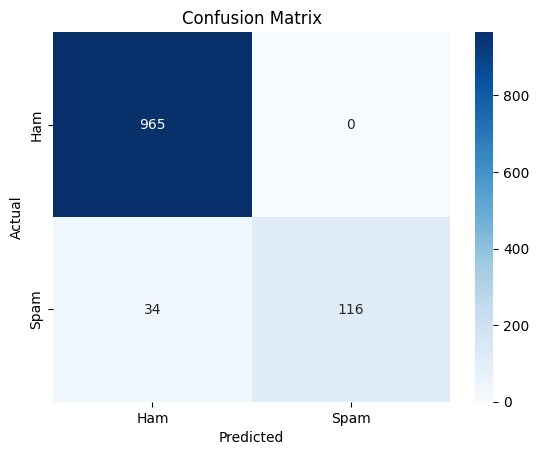

In [42]:
from sklearn.metrics import accuracy_score, classification_report
# Evaluate model
y_pred = model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Testing with the new data using naive bayes model( multinomialNB)

In [43]:
# Example real test data
real_test_data = pd.DataFrame({
    'message': [
        "Congratulations! You've won a $1000 gift card. Click here to claim now.",
        "Hey, are we still on for the meeting tomorrow?",
        "URGENT! Your account has been compromised. Respond now to secure it.",
        "Just checking in to see how you're doing!"
    ]
})

# Preprocess the test data
real_test_data['message'] = real_test_data['message'].apply(preprocess_text)

# Transform using the TF-IDF vectorizer (same one used for training)
real_test_tfidf = vectorizer.transform(real_test_data['message'])

# Predict using the trained model
predictions = model.predict(real_test_tfidf)

# Map predictions to labels for interpretability
real_test_data['prediction'] = predictions
real_test_data['prediction'] = real_test_data['prediction'].map({0: 'ham', 1: 'spam'})

# Display results
print(real_test_data)


                                  message prediction
0    congratul youv gift card click claim       spam
1                 hey still meet tomorrow        ham
2  urgent account compromis respond secur        ham
3                          check see your        ham


Building with Logistic Regression model

In [44]:

from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=15000)  # You can adjust max_features as needed
X_train_tfidf = vectorizer.fit_transform(X_train)  # Fit and transform the training data
X_test_tfidf = vectorizer.transform(X_test)  # Transform the test data

# Train Logistic Regression model
logreg_model = LogisticRegression(class_weight='balanced', max_iter=1000)  # Balanced handles class imbalance
logreg_model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred = logreg_model.predict(X_test_tfidf)

Evaluating the Logistic Regression model

Accuracy: 0.9766816143497757
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.92      0.91      0.91       150

    accuracy                           0.98      1115
   macro avg       0.95      0.95      0.95      1115
weighted avg       0.98      0.98      0.98      1115



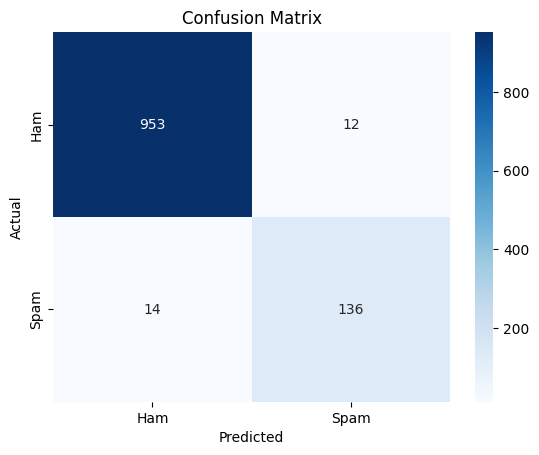

In [45]:


# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Testing with the new data

In [46]:
# Example real test data
real_test_data = pd.DataFrame({
    'message': [
        "Congratulations! You've won a $1000 gift card. Click here to claim now.",
        "Hey, are we still on for the meeting tomorrow?",
        "URGENT! Your account has been compromised. Respond now to secure it.",
        "Just checking in to see how you're doing!"
    ]
})

# Preprocess the test data
real_test_data['message'] = real_test_data['message'].apply(preprocess_text)

# Transform using the TF-IDF vectorizer (same one used for training)
real_test_tfidf = vectorizer.transform(real_test_data['message'])

# Predict using the trained model
predictions = logreg_model.predict(real_test_tfidf)

# Map predictions to labels for interpretability
real_test_data['prediction'] = predictions
real_test_data['prediction'] = real_test_data['prediction'].map({0: 'ham', 1: 'spam'})

# Display results
print(real_test_data)


                                  message prediction
0    congratul youv gift card click claim       spam
1                 hey still meet tomorrow        ham
2  urgent account compromis respond secur       spam
3                          check see your        ham


Saving the Logistic Regression model

In [48]:
import joblib

joblib.dump(logreg_model, "log_email.pkl")


['log_email.pkl']